In [54]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [55]:
rating_data = pd.read_csv('zomato.csv')
rating_data.shape

(51717, 17)

# Performing Exploritory Data Analysis

In [56]:
rating_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [57]:
rating_data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [58]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [59]:
# Dropping 'url', 'name', features as they are not rquired in model training
# Dropping 'address', "listed_in(city)", "location","cuisines" feature as they are not required for this problem
rating_data.drop(columns=['url','address','name','phone','reviews_list','menu_item',
                          "listed_in(city)",'rest_type','location','cuisines'], axis=1, inplace=True)
rating_data.head()

,online_order,book_table,rate,votes,dish_liked,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1/5,775,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",800,Buffet
1,Yes,No,4.1/5,787,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",800,Buffet
2,Yes,No,3.8/5,918,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",800,Buffet
3,No,No,3.7/5,88,Masala Dosa,300,Buffet
4,No,No,3.8/5,166,"Panipuri, Gol Gappe",600,Buffet


In [60]:
# Cheking for missing values
rating_data.isnull().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
dish_liked                     28078
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [61]:
#Renaming some feature
rating_data.rename(columns={"rate":'Rating',"approx_cost(for two people)":"Acost_2_ppl"}, inplace=True)

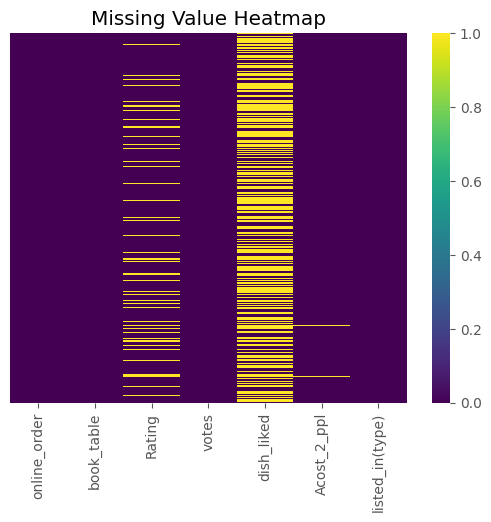

In [63]:
#Vizualizing missing values in the dataset
ax = sns.heatmap(rating_data.isnull(), yticklabels=False ,cmap="viridis")
ax.set_title("Missing Value Heatmap")
plt.show()

# Observation
- Missing values of the target feature must be seperated into a different .csv file as inference data to test the models accuracy in the final stage
- Nominal Features such as "online_order" ,"book_table" need to be encoded using one hot encoding
- Since I am dealing with a classification issue I must engineer the target features into different clasees to predict
- Data cleaning for selected feature is required

# Dealing with missing values

In [64]:
#Dropping dish_liked as it has a large volume of missing values
rating_data.drop('dish_liked',axis=1,inplace=True)

In [65]:
#Cleaning Target feature (Rating)
rating_data['Rating']=rating_data["Rating"].str.replace('/5','')

#Since I only want integer values I am converting "New" and "-" as well to null values so it will be easy to type cast 
rating_data['Rating']=rating_data["Rating"].str.replace('NEW','') 
rating_data['Rating']=rating_data["Rating"].str.replace('-','')
rating_data["Rating"]=pd.to_numeric(rating_data["Rating"])
rating_data.tail()

,online_order,book_table,Rating,votes,Acost_2_ppl,listed_in(type)
51712,No,No,3.6,27,"1,500",Pubs and bars
51713,No,No,NaN,0,600,Pubs and bars
51714,No,No,NaN,0,"2,000",Pubs and bars
51715,No,Yes,4.3,236,"2,500",Pubs and bars
51716,No,No,3.4,13,"1,500",Pubs and bars


In [66]:
#Seperating the data where rating feature is null so that we can use our model later to try and predict these values
#This will also prevent data leakage as no pre processing is happening in the inference data
Inferance_rating = rating_data[rating_data['Rating'].isna()]
rating_data = rating_data[rating_data['Rating'].notnull()]

In [67]:
Inferance_rating.drop('Rating',axis=1,inplace=True)
Inferance_rating.head()

,online_order,book_table,votes,Acost_2_ppl,listed_in(type)
72,No,No,0,150,Delivery
75,No,No,0,500,Delivery
84,No,No,0,100,Delivery
90,No,No,0,500,Delivery
91,No,No,0,400,Delivery


In [68]:
# Storing null_rating as .csv
Inferance_rating.to_csv("train_null_rating_data")

In [69]:
# Representing our target feature as 4 different class from 1 to 4 as we are dealing with multiclass classification  
# 1 = 1.0 - 1.9
# 2 = 2.0 - 2.9
# 3 = 3.0 - 3.9
# 4 = 4.0 - 4.9 
rating_data['Rating'] = rating_data['Rating'].astype(int)
rating_data.head()

,online_order,book_table,Rating,votes,Acost_2_ppl,listed_in(type)
0,Yes,Yes,4,775,800,Buffet
1,Yes,No,4,787,800,Buffet
2,Yes,No,3,918,800,Buffet
3,No,No,3,88,300,Buffet
4,No,No,3,166,600,Buffet


In [70]:
# Type casting target feature as category so that models can be developed to predict these 4 classes
rating_data.loc[:, "Rating"] = pd.Categorical(rating_data['Rating'])

In [71]:
#Cleaning feature Acost_2_ppl by removing "," and changing data type
rating_data['Acost_2_ppl'] = rating_data['Acost_2_ppl'].str.replace(",","")
rating_data['Acost_2_ppl'] = pd.to_numeric(rating_data['Acost_2_ppl'])

In [72]:
#Drop null values for Acost_2_ppl feature
rating_data = rating_data.dropna(subset=['Acost_2_ppl'])

# Univariate And Bivariate Analysis

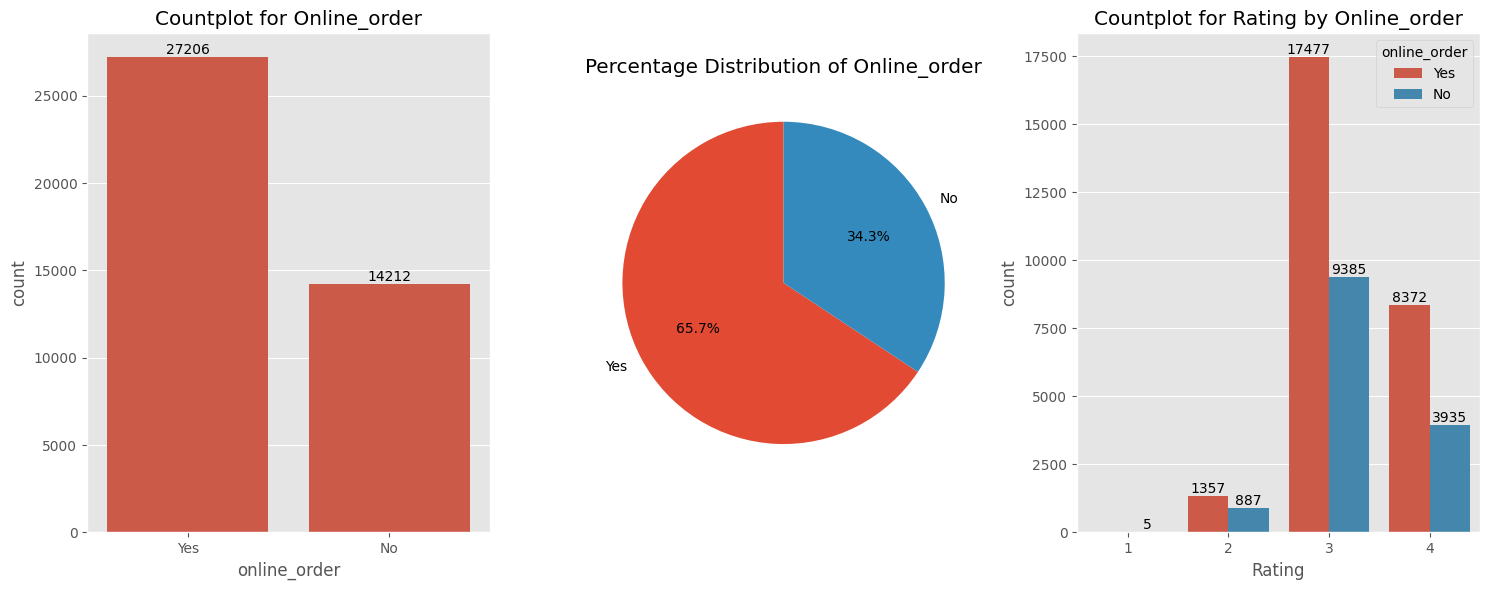

In [73]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,6))

sns.countplot(rating_data,x = 'online_order',ax=ax1)
for i in ax1.containers:
        ax1.bar_label(i)
ax1.set_title("Countplot for Online_order")

ax2.pie(rating_data['online_order'].value_counts().values,labels =['Yes','No'], autopct='%1.1f%%',startangle=90)
ax2.set_title('Percentage Distribution of Online_order')

ax = sns.countplot(data = rating_data, x = 'Rating', hue = 'online_order',ax = ax3)
for j in ax3.containers:
        ax3.bar_label(j)
ax3.set_title("Countplot for Rating by Online_order")

plt.tight_layout()
plt.show()

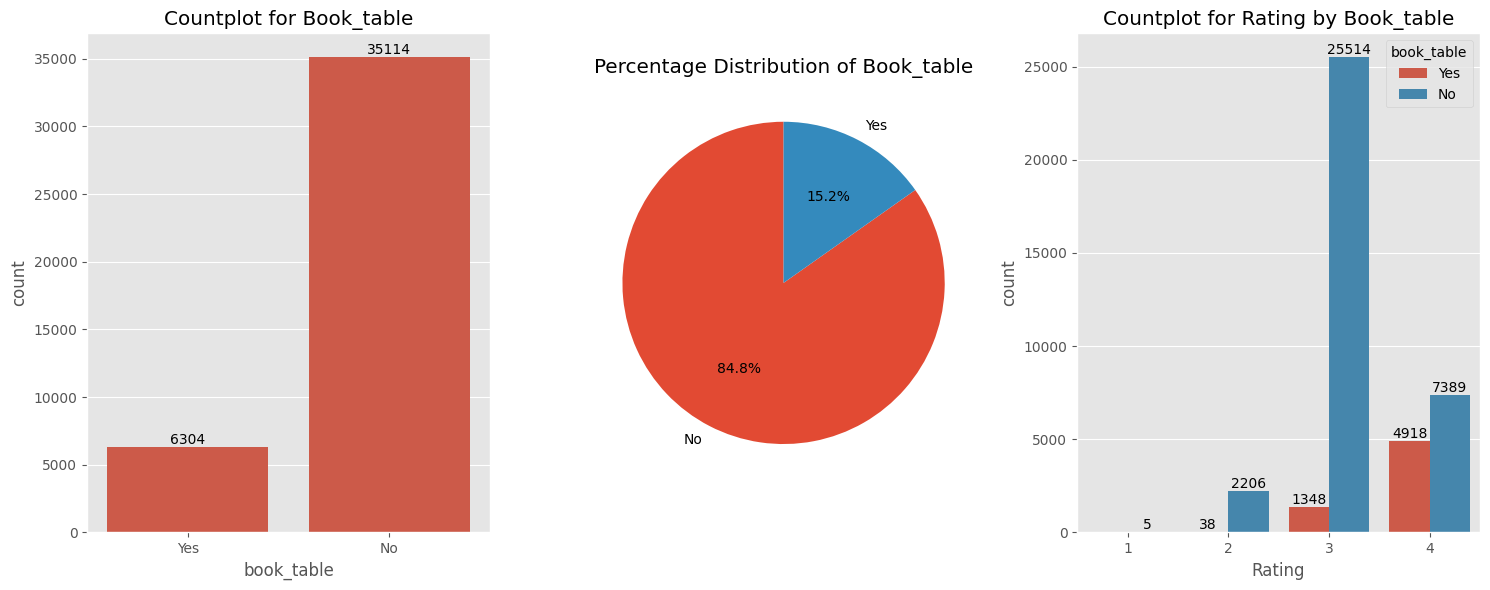

In [74]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,6))

sns.countplot(rating_data,x = 'book_table',ax=ax1)
for i in ax1.containers:
        ax1.bar_label(i)
ax1.set_title("Countplot for Book_table")

ax2.pie(rating_data['book_table'].value_counts().values,labels =['No','Yes'], autopct='%1.1f%%',startangle=90)
ax2.set_title('Percentage Distribution of Book_table')

sns.countplot(data = rating_data, x = 'Rating', hue = 'book_table',ax = ax3)
for j in ax3.containers:
        ax3.bar_label(j)
ax3.set_title("Countplot for Rating by Book_table")

plt.tight_layout()
plt.show()

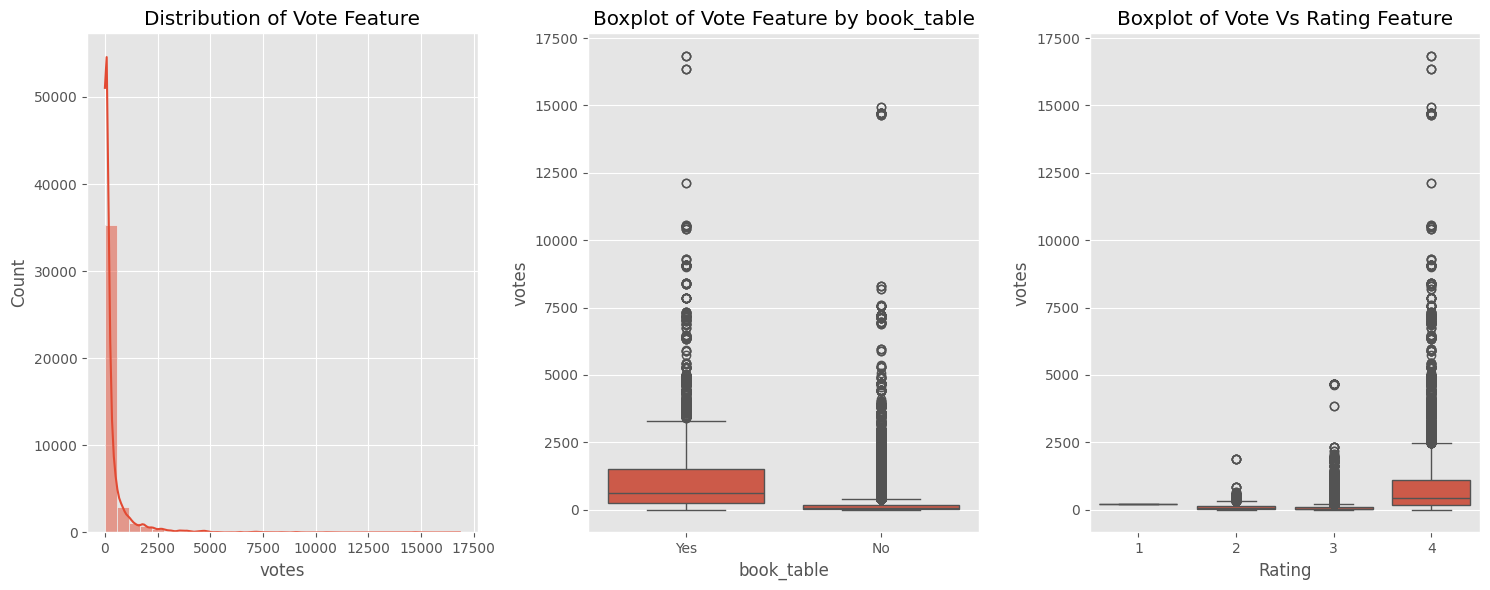

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,6))

sns.histplot(rating_data, x= 'votes', bins=30, kde=True, ax= ax1)
ax1.set_title("Distribution of Vote Feature")

sns.boxplot(rating_data, y= 'votes', x = 'book_table',ax=ax2)
ax2.set_title("Boxplot of Vote Feature by book_table")

sns.boxplot(rating_data, x='Rating', y='votes',ax=ax3)
ax3.set_title("Boxplot of Vote Vs Rating Feature")

plt.tight_layout()
plt.show()


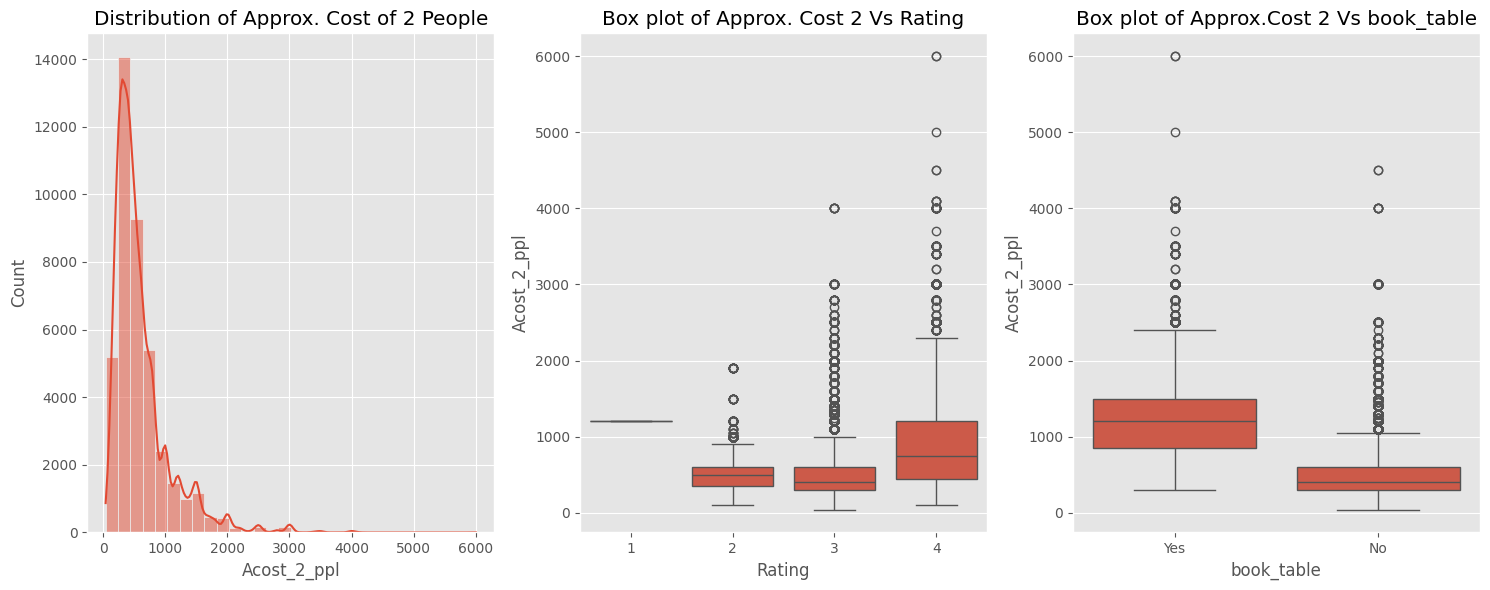

In [48]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,6))

sns.histplot(rating_data, x='Acost_2_ppl', bins=30, kde=True, ax=ax1)
ax1.set_title("Distribution of Approx. Cost of 2 People")

sns.boxplot(rating_data, x='Rating', y='Acost_2_ppl',ax=ax2)
ax2.set_title("Box plot of Approx. Cost 2 Vs Rating")

sns.boxplot(rating_data, x='book_table', y='Acost_2_ppl',ax=ax3)
ax3.set_title("Box plot of Approx.Cost 2 Vs book_table")

plt.tight_layout()
plt.show()

# Observations
- We can see significant that our categorical variables have an imbalaced distribution with book_table feature only 15% of 'No' response.
- Both votes and Approximate cost of 2 people have a right skewed distribution
- The mean value is not affected too much with the changes in rating for our numerical variable 
- There exist a great deal of outlier specifically on class 3 and 4 of the rating which makes sense as places with higher score are likely to recieve more votes 

# One hot encoding our nominal features

In [75]:
#Ecoding both online_odr and book_tbl 
online_odr = pd.get_dummies(rating_data["online_order"],drop_first="True",prefix="online").astype(int)
book_tbl = pd.get_dummies(rating_data["book_table"],drop_first="True",prefix="book").astype(int)

In [76]:
#Concating the encoded feature to the main dataframe
rating_data = pd.concat([rating_data,online_odr,book_tbl],axis=1)
rating_data = rating_data.drop(['online_order','book_table'],axis=1) #Dropping uncoded features at it is already replaced by coded featuers
rating_data.head()

,Rating,votes,Acost_2_ppl,listed_in(type),online_Yes,book_Yes
0,4,775,800.0,Buffet,1,1
1,4,787,800.0,Buffet,1,0
2,3,918,800.0,Buffet,1,0
3,3,88,300.0,Buffet,0,0
4,3,166,600.0,Buffet,0,0


# Grouping Rare categorical feature values as "others"

In [77]:
val = rating_data["listed_in(type)"].value_counts()[:2].index
def grouping(x):
    if x in val:
        return x
    else:
        return "others"

rating_data["listed_in(type)"] = rating_data['listed_in(type)'].apply(grouping)
rating_data.head()

,Rating,votes,Acost_2_ppl,listed_in(type),online_Yes,book_Yes
0,4,775,800.0,others,1,1
1,4,787,800.0,others,1,0
2,3,918,800.0,others,1,0
3,3,88,300.0,others,0,0
4,3,166,600.0,others,0,0


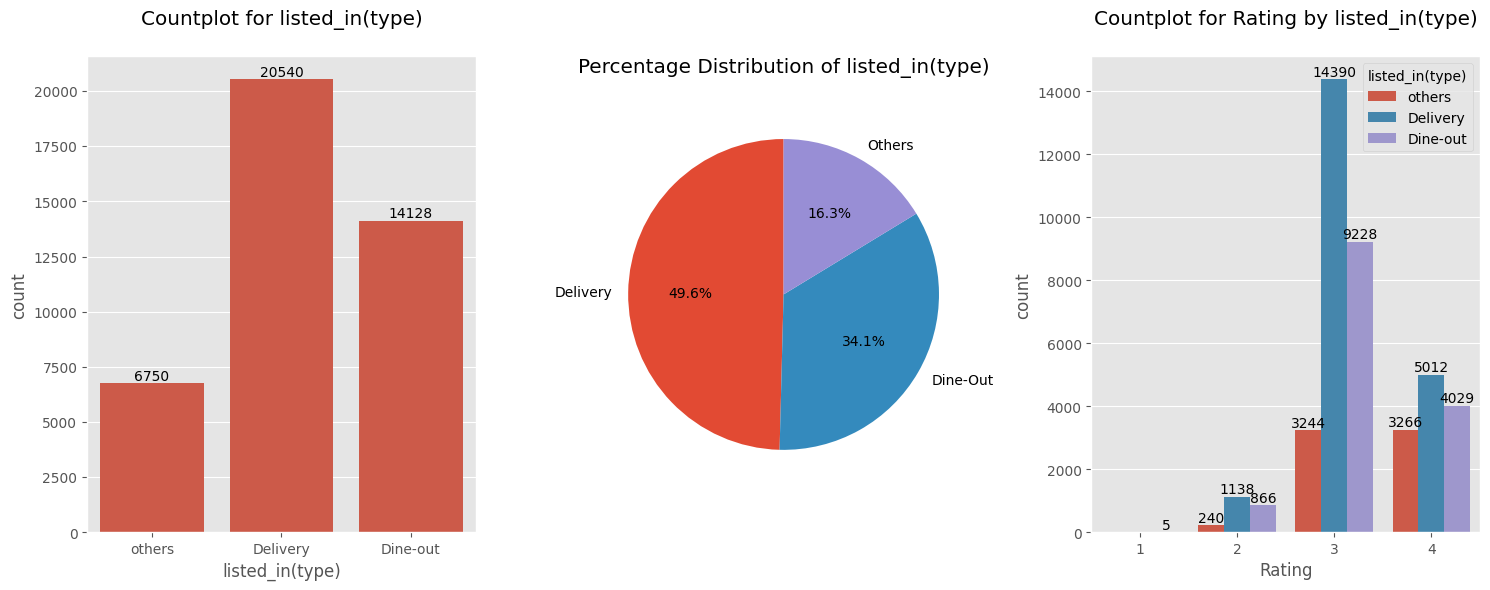

In [78]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,6))

sns.countplot(rating_data,x = 'listed_in(type)',ax=ax1)
for i in ax1.containers:
        ax1.bar_label(i)
ax1.set_title("Countplot for listed_in(type)",y=1.05)

ax2.pie(rating_data['listed_in(type)'].value_counts().values,labels =['Delivery','Dine-Out','Others'], autopct='%1.1f%%',startangle=90)
ax2.set_title('Percentage Distribution of listed_in(type)',y=1.05)

sns.countplot(data = rating_data, x = 'Rating', hue = 'listed_in(type)',ax = ax3)
for j in ax3.containers:
        ax3.bar_label(j)
ax3.set_title("Countplot for Rating by listed_in(type)",y=1.05)

plt.tight_layout()
plt.show()

- Class 3 of rating contains a great deal of deilivery type

In [79]:
# One hot encoding listed_in(type) as it contains nominal values 
listed_in_typ = pd.get_dummies(rating_data["listed_in(type)"],drop_first=True).astype(int)

In [80]:
#Concating the encoded feature to the main dataframe
rating_data = pd.concat([rating_data,listed_in_typ],axis=1)
rating_data = rating_data.drop(['listed_in(type)'],axis=1) #Dropping uncoded features at it is already replaced by coded featuers
rating_data.head()

,Rating,votes,Acost_2_ppl,online_Yes,book_Yes,Dine-out,others
0,4,775,800.0,1,1,0,1
1,4,787,800.0,1,0,0,1
2,3,918,800.0,1,0,0,1
3,3,88,300.0,0,0,0,1
4,3,166,600.0,0,0,0,1


In [81]:
rating_data.describe()

,votes,Acost_2_ppl,online_Yes,book_Yes,Dine-out,others
count,41418.000000,41418.000000,41418.000000,41418.000000,41418.000000,41418.000000
mean,351.726013,603.268048,0.656864,0.152204,0.341108,0.162973
std,882.697962,464.327857,0.474762,0.359223,0.474087,0.369345
min,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,300.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,500.000000,1.000000,0.000000,0.000000,0.000000
75%,277.000000,700.000000,1.000000,0.000000,1.000000,0.000000
max,16832.000000,6000.000000,1.000000,1.000000,1.000000,1.000000


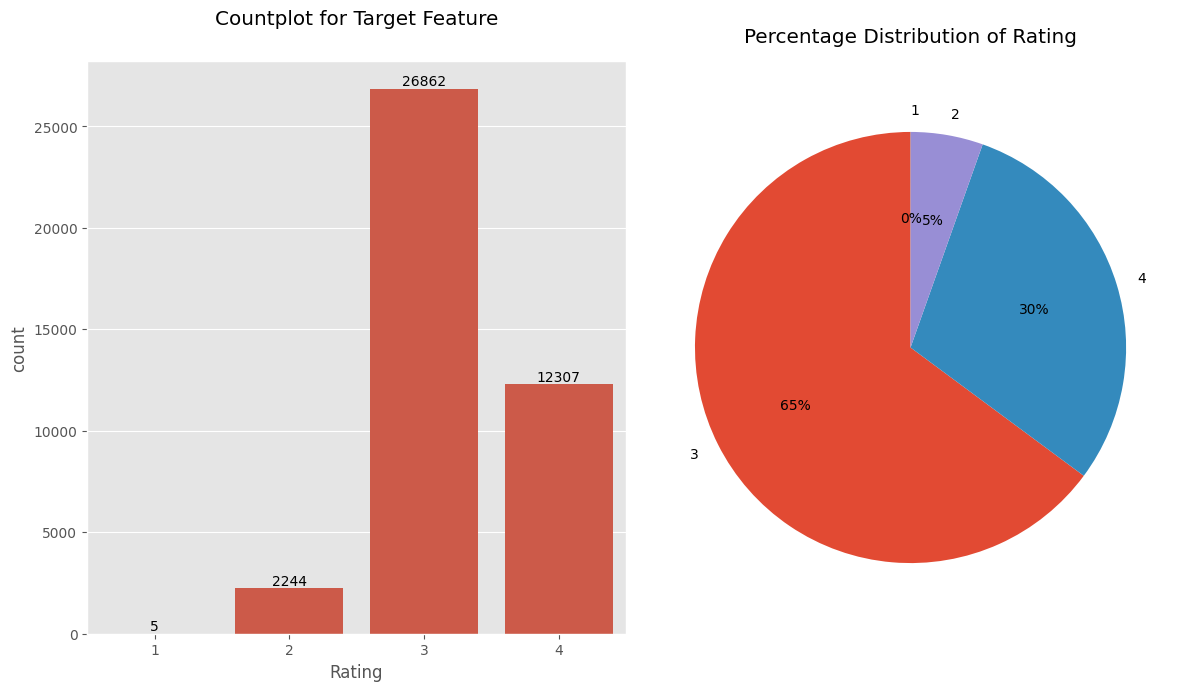

In [91]:
# Target Feature Distribution (note that this particular feature has been processed into 4 different class) 
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,7))

sns.countplot(rating_data,x = 'Rating', ax=ax1)
for i in ax1.containers:
        ax1.bar_label(i)
ax1.set_title("Countplot for Target Feature",y=1.05)

ax2.pie(rating_data['Rating'].value_counts().values,labels =['3','4','2','1'], autopct='%1.0f%%',startangle=90)
ax2.set_title('Percentage Distribution of Rating',y=1.05)

plt.tight_layout()
plt.show()

- Traget feature class distribution is imbalanced as we do not see much representation for class 1 and 2 of rating


In [92]:
rating_data.corr()

,Rating,votes,Acost_2_ppl,online_Yes,book_Yes,Dine-out,others
Rating,1.000000,0.394123,0.362140,0.038673,0.416035,-0.025987,0.167613
votes,0.394123,1.000000,0.366700,-0.013319,0.393434,0.007965,0.134923
Acost_2_ppl,0.362140,0.366700,1.000000,-0.175517,0.614338,0.079479,0.210615
online_Yes,0.038673,-0.013319,-0.175517,1.000000,-0.054771,-0.185814,-0.187515
book_Yes,0.416035,0.393434,0.614338,-0.054771,1.000000,0.035962,0.175906
Dine-out,-0.025987,0.007965,0.079479,-0.185814,0.035962,1.000000,-0.317487
others,0.167613,0.134923,0.210615,-0.187515,0.175906,-0.317487,1.000000


# Multivariate Analyis

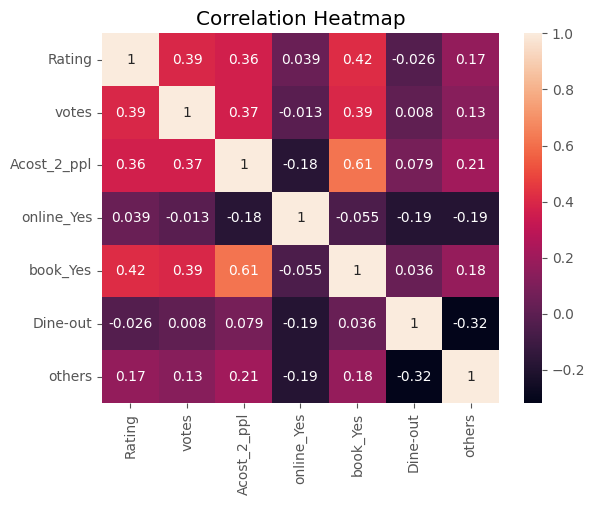

In [93]:
ax = sns.heatmap(rating_data.corr(), annot=True)
ax.set_title("Correlation Heatmap")
plt.show()

- The high correlation between dine-out and other give us a reason to drop Dine-out feature as it also shows low correlation with the target feature

In [55]:
rating_data.drop('Dine-out', axis=1, inplace=True)

# Traning our Classification models
- Logistic Regression
- Random Forest 
- K-Neighbour

In [56]:
rating_data.columns

Index(['Rating', 'votes', 'Acost_2_ppl', 'online_Yes', 'book_Yes', 'others'], dtype='object')

In [57]:
x = rating_data[['votes', 'Acost_2_ppl', 'online_Yes', 'book_Yes','others']]
y = rating_data['Rating']

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=101)

# Decision Tree Model

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [94]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
dt_prediction = dt_model.predict(x_test)

In [96]:
df_cfm = confusion_matrix(y_test,dt_prediction)
print(df_cfm)

[[   2    0    0    0]
 [   0  331  314   28]
 [   0  170 7578  311]
 [   1   37  557 3097]]


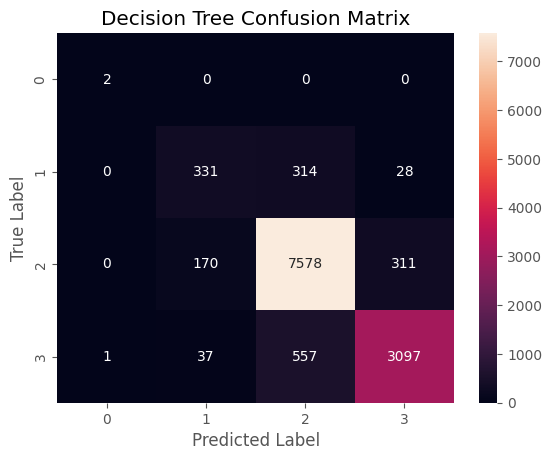

In [97]:
ax = sns.heatmap(df_cfm,annot= True, fmt='d')
ax.set_title("Decision Tree Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [98]:
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.62      0.49      0.55       673
           3       0.90      0.94      0.92      8059
           4       0.90      0.84      0.87      3692

    accuracy                           0.89     12426
   macro avg       0.77      0.82      0.78     12426
weighted avg       0.88      0.89      0.88     12426



# Pycaret

In [59]:
from pycaret.classification import *
s = setup(rating_data, target='Rating', session_id=123)

,Description,Value
0,Session id,123
1,Target,Rating
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(41418, 6)"
5,Transformed data shape,"(41418, 6)"
6,Transformed train set shape,"(28992, 6)"
7,Transformed test set shape,"(12426, 6)"
8,Numeric features,5
9,Preprocess,True


In [60]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:32:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8827,0.2813,0.8827,0.8805,0.8808,0.7541,0.7553,0.5980
rf,Random Forest Classifier,0.8825,0.2834,0.8825,0.8789,0.8797,0.7533,0.7544,0.7330
dt,Decision Tree Classifier,0.8783,0.2719,0.8783,0.8766,0.8767,0.7452,0.7464,0.0560
knn,K Neighbors Classifier,0.8514,0.2776,0.8514,0.8458,0.8471,0.6850,0.6871,0.1140
gbc,Gradient Boosting Classifier,0.8010,0.0000,0.8010,0.7765,0.7756,0.5504,0.5626,3.4120
lr,Logistic Regression,0.7817,0.0000,0.7817,0.7452,0.7499,0.4832,0.5146,3.2000
nb,Naive Bayes,0.7667,0.2238,0.7667,0.7258,0.7361,0.4535,0.4773,0.0470
ridge,Ridge Classifier,0.7516,0.0000,0.7516,0.7189,0.7131,0.3959,0.4386,0.0450
lda,Linear Discriminant Analysis,0.7508,0.0000,0.7508,0.7195,0.7133,0.3963,0.4376,0.0460
svm,SVM - Linear Kernel,0.7360,0.0000,0.7360,0.7280,0.7163,0.4216,0.4409,0.5960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Random Forest Classifier (Best fit)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [102]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [103]:
rf_prediction = rf_model.predict(x_test) 

In [104]:
rf_cfm = confusion_matrix(y_test,rf_prediction)
print(rf_cfm)

[[   2    0    0    0]
 [   0  304  336   33]
 [   0  125 7574  360]
 [   0   22  510 3160]]


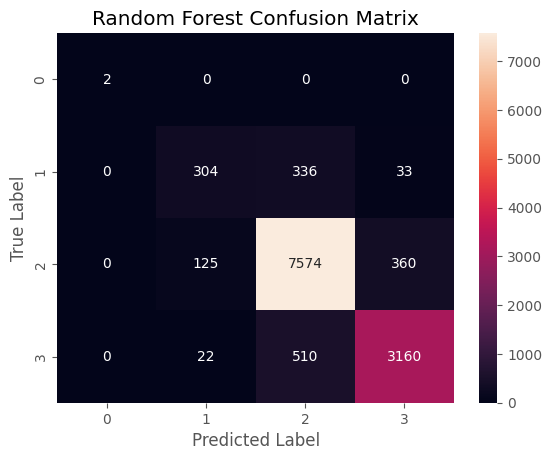

In [105]:
ax = sns.heatmap(rf_cfm,annot= True, fmt='d')
ax.set_title("Random Forest Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [106]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.67      0.45      0.54       673
           3       0.90      0.94      0.92      8059
           4       0.89      0.86      0.87      3692

    accuracy                           0.89     12426
   macro avg       0.87      0.81      0.83     12426
weighted avg       0.88      0.89      0.88     12426



# K Neighbors Classifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [108]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
knn_prediction = knn_model.predict(x_test)

In [110]:
knn_cfm = confusion_matrix(y_test,knn_prediction)
knn_cfm

array([[   2,    0,    0,    0],
       [   0,  252,  379,   42],
       [   0,  158, 7444,  457],
       [   0,   51,  716, 2925]])

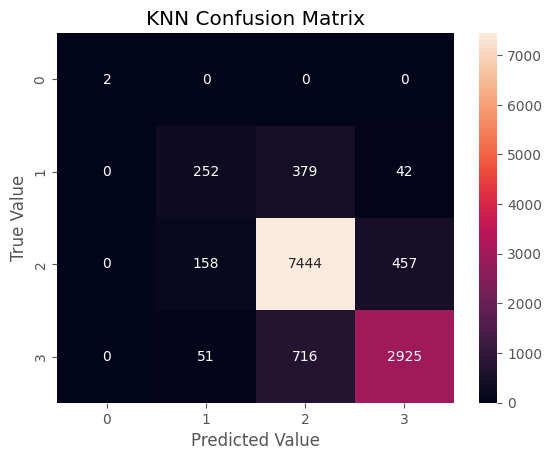

In [111]:
ax = sns.heatmap(knn_cfm, annot = True, fmt = "d")
ax.set_title("KNN Confusion Matrix")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("True Value")
plt.show()

In [112]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.55      0.37      0.44       673
           3       0.87      0.92      0.90      8059
           4       0.85      0.79      0.82      3692

    accuracy                           0.85     12426
   macro avg       0.82      0.77      0.79     12426
weighted avg       0.85      0.85      0.85     12426



# CatBoost

In [113]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier()

In [114]:
cb_model.fit(x_train,y_train)

Learning rate set to 0.093951
0:	learn: 1.2290861	total: 10.4ms	remaining: 10.4s
1:	learn: 1.1152179	total: 20.3ms	remaining: 10.2s
2:	learn: 1.0265926	total: 39.8ms	remaining: 13.2s
3:	learn: 0.9547627	total: 55.4ms	remaining: 13.8s
4:	learn: 0.8976047	total: 65.8ms	remaining: 13.1s
5:	learn: 0.8495059	total: 80.9ms	remaining: 13.4s
6:	learn: 0.8085158	total: 93.6ms	remaining: 13.3s
7:	learn: 0.7737141	total: 109ms	remaining: 13.5s
8:	learn: 0.7435750	total: 125ms	remaining: 13.8s
9:	learn: 0.7184403	total: 136ms	remaining: 13.5s
10:	learn: 0.6956948	total: 144ms	remaining: 12.9s
11:	learn: 0.6755863	total: 155ms	remaining: 12.7s
12:	learn: 0.6582597	total: 167ms	remaining: 12.7s
13:	learn: 0.6426558	total: 175ms	remaining: 12.4s
14:	learn: 0.6291282	total: 192ms	remaining: 12.6s
15:	learn: 0.6170408	total: 206ms	remaining: 12.7s
16:	learn: 0.6065012	total: 219ms	remaining: 12.7s
17:	learn: 0.5967969	total: 229ms	remaining: 12.5s
18:	learn: 0.5881840	total: 242ms	remaining: 12.5s
19:	

In [115]:
cb_prediction = cb_model.predict(x_test)

In [116]:
cb_cfm = confusion_matrix(y_test,cb_prediction)
cb_cfm

array([[   2,    0,    0,    0],
       [   0,   57,  567,   49],
       [   0,    7, 7599,  453],
       [   0,    7,  896, 2789]])

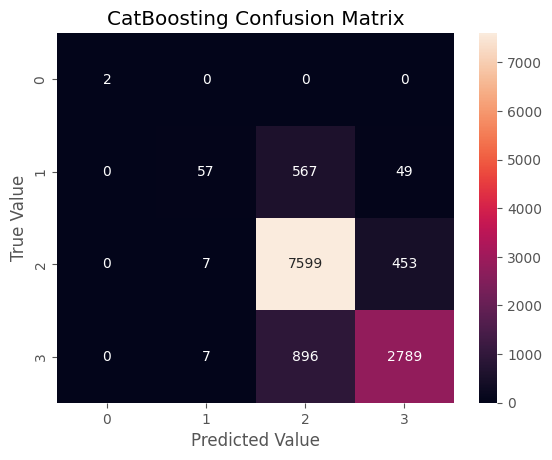

In [117]:
ax = sns.heatmap(cb_cfm, annot = True, fmt = "d")
ax.set_title("CatBoosting Confusion Matrix")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("True Value")
plt.show()

In [118]:
print(classification_report(y_test,cb_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.80      0.08      0.15       673
           3       0.84      0.94      0.89      8059
           4       0.85      0.76      0.80      3692

    accuracy                           0.84     12426
   macro avg       0.87      0.70      0.71     12426
weighted avg       0.84      0.84      0.82     12426



# Using Stacking Technique

In [119]:
from mlxtend.classifier import StackingClassifier

In [120]:
stk_cls = StackingClassifier(classifiers=[dt_model,rf_model,knn_model],
                             meta_classifier=rf_model)

In [121]:
stk_cls.fit(x_train,y_train)

StackingClassifier(classifiers=[DecisionTreeClassifier(),
                                RandomForestClassifier(),
                                KNeighborsClassifier()],
                   meta_classifier=RandomForestClassifier())

In [122]:
stk_prediction = stk_cls.predict(x_test)

In [123]:
stk_cfm = confusion_matrix(y_test,stk_prediction)
print(stk_cfm)

[[   2    0    0    0]
 [   0  318  328   27]
 [   0  130 7571  358]
 [   0   30  485 3177]]


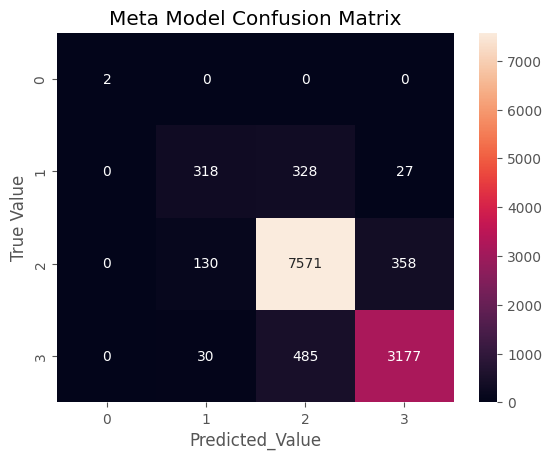

In [124]:
ax = sns.heatmap(stk_cfm, annot=True, fmt='d')
ax.set_title("Meta Model Confusion Matrix")
ax.set_xlabel("Predicted_Value")
ax.set_ylabel("True Value")
plt.show()

In [125]:
print(classification_report(y_test,stk_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.67      0.47      0.55       673
           3       0.90      0.94      0.92      8059
           4       0.89      0.86      0.88      3692

    accuracy                           0.89     12426
   macro avg       0.87      0.82      0.84     12426
weighted avg       0.89      0.89      0.89     12426



# Using Blending Technique

In [126]:
meta_feature = np.column_stack((dt_prediction,rf_prediction,knn_prediction))

In [127]:
from sklearn.ensemble import ExtraTreesClassifier
etc_model = ExtraTreesClassifier()

In [128]:
# Training Meta model
etc_model.fit(meta_feature,y_test)

ExtraTreesClassifier()

In [129]:
bld_predict = etc_model.predict(meta_feature)

In [130]:
bld_cfm = confusion_matrix(y_test,bld_predict)
bld_cfm

array([[   2,    0,    0,    0],
       [   0,  315,  328,   30],
       [   0,  132, 7572,  355],
       [   0,   21,  493, 3178]])

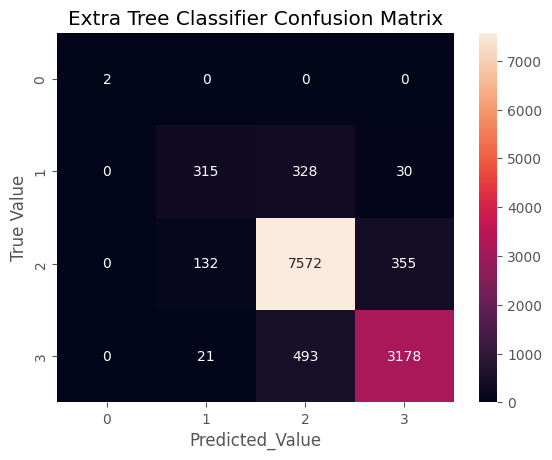

In [5]:
ax = sns.heatmap(bld_cfm, annot=True, fmt='d')
ax.set_title("Extra Tree Classifier Confusion Matrix")
ax.set_xlabel("Predicted_Value")
ax.set_ylabel("True Value")
plt.show()

In [131]:
print(classification_report(y_test,bld_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.67      0.47      0.55       673
           3       0.90      0.94      0.92      8059
           4       0.89      0.86      0.88      3692

    accuracy                           0.89     12426
   macro avg       0.87      0.82      0.84     12426
weighted avg       0.89      0.89      0.89     12426



Most models have acceptable results F1-scores for class 3 and 4 prediction but stacking, blending and decsion tree have resulted better class 2 prediction while the lack of enough train and test data prove to be a challenge for class 1 prediction as there were only 5 instances of class 1 in our dataset